In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [20]:
os.chdir(path)

In [21]:
cwd = os.getcwd()

## DATA CLEANING

In [342]:
#Read the data
df=pd.read_csv('adventure_works_purchase_orders.csv')

In [343]:
#Check NA-s in dataframe

column_names=df.columns.values.tolist()

for i in column_names:
    count_nan = df[i].isnull().sum()
    print (i,count_nan)

SalesOrderNumber 0
OrderDate 0
DueDate 0
ShipDate 0
Sales_Person 0
Sales_Region 0
Sales_Province 0
Sales_City 0
Sales_Postal_Code 0
Customer_Code 0
Customer_Name 0
Customer_Region 0
Customer_Province 0
Customer_City 0
Customer_Postal_Code 0
LineItem_Id 0
Product_Category 0
Product_Sub_Category 0
Product_Name 0
Product_Code 0
Unit_Cost 0
UnitPrice 0
UnitPriceDiscount 0
OrderQty 0
Unit_Freight_Cost 0


In [344]:
#Change Date type data to exact date type
df['OrderDate'] = pd.to_datetime(df.OrderDate)
df['DueDate'] = pd.to_datetime(df.DueDate)
df['ShipDate'] = pd.to_datetime(df.DueDate)

In [345]:
#Create Order month and Order year
df['Order_year']=pd.DatetimeIndex(df["OrderDate"]).year
df['Order_month']=pd.DatetimeIndex(df["OrderDate"]).month
df['Order_year_month']=df['OrderDate'].dt.strftime('%Y-%m')

In [346]:
#Calculate the real unit price(weighted by the discount), add revenue column and cost column

df['real_unit_price']=df['UnitPrice']*(1-df['UnitPriceDiscount'])

df['revenue']=df['real_unit_price']*df['OrderQty']

df['cost']=(df['Unit_Cost']+df['Unit_Freight_Cost'])*df['OrderQty']


## Create Some High level measure

In [541]:
#Get the monthly performance
monthly_summary=df.groupby(by=["Order_year_month",'Order_year','Order_month'], dropna=False,as_index=False)\
.agg({'Unit_Cost':'mean',
     'UnitPrice':'mean',
     'real_unit_price':'mean',
     'UnitPriceDiscount':'mean',
     'revenue':'sum',
     'cost':'sum',
     'OrderQty':'sum',
     'Unit_Freight_Cost':'mean'})\
.sort_values(by=["Order_year_month",'Order_year','Order_month'])[["Order_year_month",
                                                                  'Order_year',
                                                                  'Order_month',
                                                                  'Unit_Cost',
                                                                  'UnitPrice',
                                                                  'real_unit_price',
                                                                  'UnitPriceDiscount',
                                                                  'revenue',
                                                                  'cost',
                                                                  'OrderQty',
                                                                  'Unit_Freight_Cost']]

monthly_summary['profit(in_million_$)']=monthly_summary['revenue']-monthly_summary['cost']

#Rounding the numbers
monthly_summary=monthly_summary.round({'Unit_Cost':2,
                                      'UnitPrice':2,
                                      'real_unit_price':2,
                                      'Unit_Freight_Cost':2,
                                      'revenue':2,
                                      'cost':2,
                                      'profit(in_million_$)':2})

Text(0.5, 1.0, 'Profit by month since 2007 (in million USD)')

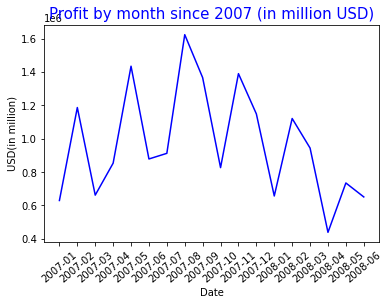

In [614]:
#Visualize the monthly Profit since 2007

data_2008=monthly_summary[(monthly_summary['Order_year']>2006)]

date = data_2008["Order_year_month"]
value = data_2008["profit(in_million_$)"]

plt.plot(date, value, color='blue') 
plt.xlabel('Date') 
plt.ylabel('USD(in million)')
plt.xticks(rotation = 40)

plt.title(label="Profit by month since 2007 (in million USD)",
          fontsize=15,
          color="blue")

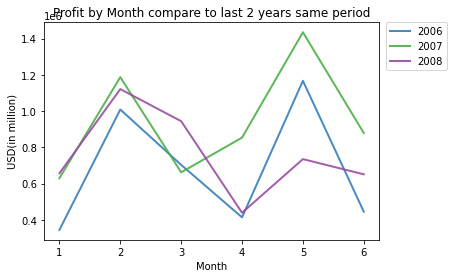

In [674]:
# Plot Profit Changes by Year and Month 


data=monthly_summary[(monthly_summary['Order_month']<7)]
data=data[['Order_year','Order_month','profit(in_million_$)']]
data = data.pivot_table(index=['Order_month'], 
            columns=['Order_year'], values='profit(in_million_$)')
data['Order_month']=data.index
data.reset_index(drop=True)

palette = plt.get_cmap('Set1')

num=0

for column in data.drop('Order_month', axis=1):
    num+=1
    plt.plot(data['Order_month'], data[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
 
# Add titles
plt.title("Profit by Month compare to last 2 years same period")
plt.xlabel("Month")
plt.ylabel("USD(in million)")

# Show the graph
plt.show()

In [708]:
compare_to_2006=(data[2008].sum()/data[2006].sum())*100
print('compare_to_2006:',compare_to_2006)

compare_to_2007=(data[2008].sum()/data[2007].sum())*100
print('compare_to_2007:',compare_to_2007)


comp_l3_to2006=(data[(data['Order_month']>3)][2008].sum()/data[(data['Order_month']>3)][2006].sum())*100
print('compare the last 3 months to 2006:',comp_l3_to2006)

comp_l3_to2007=(data[(data['Order_month']>3)][2008].sum()/data[(data['Order_month']>3)][2007].sum())*100
print('compare the last 3 months to 2007:',comp_l3_to2007)

compare_to_2006: 111.40770084865161
compare_to_2007: 80.53546771678873
compare the last 3 months to 2006: 90.09495636631468
compare the last 3 months to 2007: 57.61417406535594


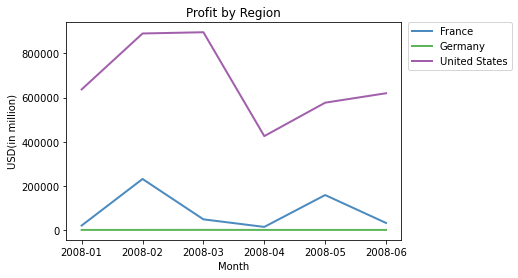

In [616]:
#Checking Profit Changes by Region

data=df[(df['Order_year']>2007)][['Order_year_month','Sales_Region','revenue','cost']]
data=data.groupby(by=["Order_year_month",'Sales_Region'], dropna=False,as_index=False).sum()
data['profit']=data['revenue']-data['cost']
data=data.round({'revenue':2,
                 'cost':2,
                 'profit':2})
data = data.pivot_table(index=['Order_year_month'], 
            columns=['Sales_Region'], values='profit')

data=data.replace(np.nan, 0)

data['Order_year_month']=data.index
data.reset_index(drop=True)

palette = plt.get_cmap('Set1')

num=0

for column in data.drop('Order_year_month', axis=1):
    num+=1
    plt.plot(data['Order_year_month'], data[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
 
# Add titles
plt.title("Profit by Region")
plt.xlabel("Month")
plt.ylabel("USD(in million)")

# Show the graph
plt.show()

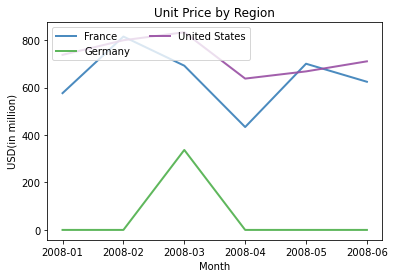

In [561]:
#Checking Unit Price Changes by Region

data=df[(df['Order_year']>2007)][['Order_year_month','Sales_Region','UnitPrice']]
data=data.groupby(by=["Order_year_month",'Sales_Region'], dropna=False,as_index=False).mean()
#data['profit']=data['revenue']-data['cost']
data=data.round({'UnitPrice':2})
data = data.pivot_table(index=['Order_year_month'], 
            columns=['Sales_Region'], values='UnitPrice')

data=data.replace(np.nan, 0)

data['Order_year_month']=data.index
data.reset_index(drop=True)

palette = plt.get_cmap('Set1')

num=0

for column in data.drop('Order_year_month', axis=1):
    num+=1
    plt.plot(data['Order_year_month'], data[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("Unit Price by Region")
plt.xlabel("Month")
plt.ylabel("USD(in million)")

# Show the graph
plt.show()

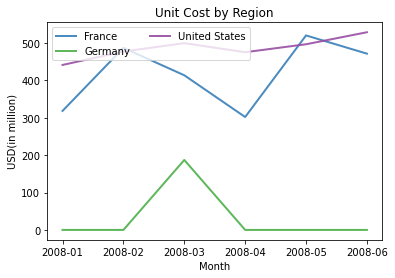

In [562]:
#Checking Unit Cost Changes by Region

data=df[(df['Order_year']>2007)][['Order_year_month','Sales_Region','Unit_Cost']]
data=data.groupby(by=["Order_year_month",'Sales_Region'], dropna=False,as_index=False).mean()
#data['profit']=data['revenue']-data['cost']
data=data.round({'Unit_Cost':2})
data = data.pivot_table(index=['Order_year_month'], 
            columns=['Sales_Region'], values='Unit_Cost')

data=data.replace(np.nan, 0)

data['Order_year_month']=data.index
data.reset_index(drop=True)

palette = plt.get_cmap('Set1')

num=0

for column in data.drop('Order_year_month', axis=1):
    num+=1
    plt.plot(data['Order_year_month'], data[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("Unit Cost by Region")
plt.xlabel("Month")
plt.ylabel("USD(in million)")

# Show the graph
plt.show()

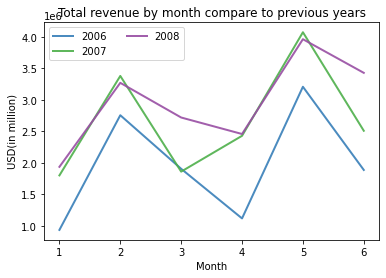

compare_to_2006: 150.56908310352958
compare_to_2007: 110.74144751508166
compare the last 3 months to 2006: 158.58769003175425
compare the last 3 months to 2007: 109.30026479850987


In [709]:
# Plot Revenue Changes by Year and Month 


data=monthly_summary[(monthly_summary['Order_month']<7)]
data=data[['Order_year','Order_month','revenue']]
data = data.pivot_table(index=['Order_month'], 
            columns=['Order_year'], values='revenue')
data['Order_month']=data.index
data.reset_index(drop=True)

palette = plt.get_cmap('Set1')

num=0

for column in data.drop('Order_month', axis=1):
    num+=1
    plt.plot(data['Order_month'], data[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("Total revenue by month compare to previous years")
plt.xlabel("Month")
plt.ylabel("USD(in million)")

# Show the graph
plt.show()

compare_to_2006=(data[2008].sum()/data[2006].sum())*100
print('compare_to_2006:',compare_to_2006)

compare_to_2007=(data[2008].sum()/data[2007].sum())*100
print('compare_to_2007:',compare_to_2007)


comp_l3_to2006=(data[(data['Order_month']>3)][2008].sum()/data[(data['Order_month']>3)][2006].sum())*100
print('compare the last 3 months to 2006:',comp_l3_to2006)

comp_l3_to2007=(data[(data['Order_month']>3)][2008].sum()/data[(data['Order_month']>3)][2007].sum())*100
print('compare the last 3 months to 2007:',comp_l3_to2007)

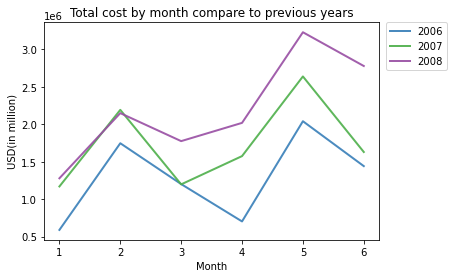

compare_to_2006: 171.27839006576164
compare_to_2007: 127.14444951113147
compare the last 3 months to 2006: 191.75685857797703
compare the last 3 months to 2007: 137.33246740356688


In [710]:
# Plot Cost Changes by Year and Month 


data=monthly_summary[(monthly_summary['Order_month']<7)]
data=data[['Order_year','Order_month','cost']]
data = data.pivot_table(index=['Order_month'], 
            columns=['Order_year'], values='cost')
data['Order_month']=data.index
data.reset_index(drop=True)

palette = plt.get_cmap('Set1')

num=0

for column in data.drop('Order_month', axis=1):
    num+=1
    plt.plot(data['Order_month'], data[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
 
# Add titles
plt.title("Total cost by month compare to previous years")
plt.xlabel("Month")
plt.ylabel("USD(in million)")

# Show the graph
plt.show()

compare_to_2006=(data[2008].sum()/data[2006].sum())*100
print('compare_to_2006:',compare_to_2006)

compare_to_2007=(data[2008].sum()/data[2007].sum())*100
print('compare_to_2007:',compare_to_2007)


comp_l3_to2006=(data[(data['Order_month']>3)][2008].sum()/data[(data['Order_month']>3)][2006].sum())*100
print('compare the last 3 months to 2006:',comp_l3_to2006)

comp_l3_to2007=(data[(data['Order_month']>3)][2008].sum()/data[(data['Order_month']>3)][2007].sum())*100
print('compare the last 3 months to 2007:',comp_l3_to2007)

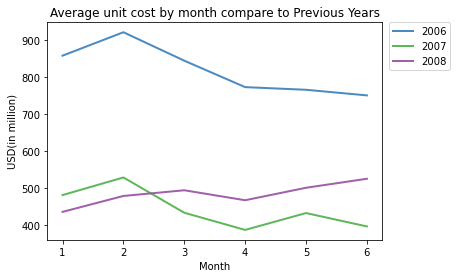

compare_to_2006: 59.16917791891048
compare_to_2007: 109.08937231640752
compare the last 3 months to 2006: 65.32334219362059
compare the last 3 months to 2007: 122.70409210731617


In [711]:
# Plot Unit Cost Changes by Year and Month 


data=monthly_summary[(monthly_summary['Order_month']<7)]
data=data[['Order_year','Order_month','Unit_Cost']]
data = data.pivot_table(index=['Order_month'], 
            columns=['Order_year'], values='Unit_Cost')
data['Order_month']=data.index
data.reset_index(drop=True)

palette = plt.get_cmap('Set1')

num=0

for column in data.drop('Order_month', axis=1):
    num+=1
    plt.plot(data['Order_month'], data[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
 
# Add titles
plt.title("Average unit cost by month compare to Previous Years")
plt.xlabel("Month")
plt.ylabel("USD(in million)")

# Show the graph
plt.show()

compare_to_2006=(data[2008].mean()/data[2006].mean())*100
print('compare_to_2006:',compare_to_2006)

compare_to_2007=(data[2008].mean()/data[2007].mean())*100
print('compare_to_2007:',compare_to_2007)


comp_l3_to2006=(data[(data['Order_month']>3)][2008].mean()/data[(data['Order_month']>3)][2006].mean())*100
print('compare the last 3 months to 2006:',comp_l3_to2006)

comp_l3_to2007=(data[(data['Order_month']>3)][2008].mean()/data[(data['Order_month']>3)][2007].mean())*100
print('compare the last 3 months to 2007:',comp_l3_to2007)

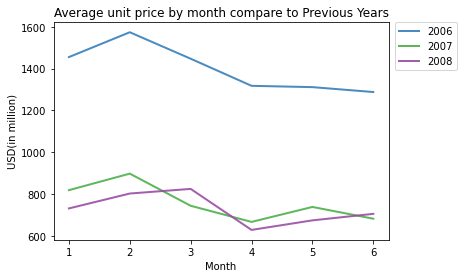

compare_to_2006: 52.05460514947296
compare_to_2007: 96.02129712880058
compare the last 3 months to 2006: 51.29781752162178
compare the last 3 months to 2007: 96.20849676019711


In [712]:
# Plot Unit Price Changes by Year and Month 


data=monthly_summary[(monthly_summary['Order_month']<7)]
data=data[['Order_year','Order_month','UnitPrice']]
data = data.pivot_table(index=['Order_month'], 
            columns=['Order_year'], values='UnitPrice')
data['Order_month']=data.index
data.reset_index(drop=True)

palette = plt.get_cmap('Set1')

num=0

for column in data.drop('Order_month', axis=1):
    num+=1
    plt.plot(data['Order_month'], data[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
 
# Add titles
plt.title("Average unit price by month compare to Previous Years")
plt.xlabel("Month")
plt.ylabel("USD(in million)")

# Show the graph
plt.show()

compare_to_2006=(data[2008].mean()/data[2006].mean())*100
print('compare_to_2006:',compare_to_2006)

compare_to_2007=(data[2008].mean()/data[2007].mean())*100
print('compare_to_2007:',compare_to_2007)


comp_l3_to2006=(data[(data['Order_month']>3)][2008].mean()/data[(data['Order_month']>3)][2006].mean())*100
print('compare the last 3 months to 2006:',comp_l3_to2006)

comp_l3_to2007=(data[(data['Order_month']>3)][2008].mean()/data[(data['Order_month']>3)][2007].mean())*100
print('compare the last 3 months to 2007:',comp_l3_to2007)

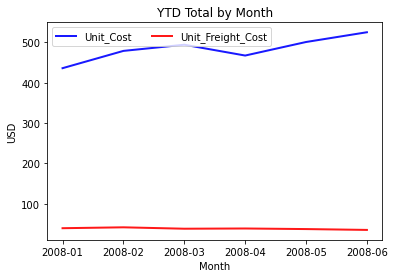

In [357]:
# Plot UnitPrice  Changes by Year and Month 

data=monthly_summary[(monthly_summary['Order_year']==2008)]
data=data[['Order_year_month','Unit_Cost','Unit_Freight_Cost']]
palette = plt.get_cmap('Set1')

plt.plot(data['Order_year_month'], data['Unit_Cost'], marker='', color='blue', linewidth=2, alpha=0.9, label='Unit_Cost')
plt.plot(data['Order_year_month'], data['Unit_Freight_Cost'], marker='', color='red', linewidth=2, alpha=0.9, label='Unit_Freight_Cost')

# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("YTD Total by Month")
plt.xlabel("Month")
plt.ylabel("USD")

# Show the graph
plt.show()

## Product Type Analysis

In [432]:
data_by_product=df[(df['OrderDate']>'2006-12-31')]

data_by_product=data_by_product[['Product_Category','Order_year_month','OrderQty']]

data_by_product=data_by_product.groupby(by=['Order_year_month','Product_Category']).sum()

data_by_product = data_by_product.pivot_table(index=['Order_year_month'], 
            columns=['Product_Category'], values='OrderQty')
data_by_product['Order_year_month']=data_by_product.index

data_by_product=data_by_product.reset_index(drop=True)

data_by_product=data_by_product.replace(np.nan, 0)

data_by_product.dtypes

Product_Category
Accessories          int64
Bikes                int64
Clothing             int64
Components           int64
Order_year_month    object
dtype: object

In [433]:
data_by_cost=monthly_summary[(monthly_summary['Order_year']>2006)]
data_by_cost=data_by_cost[['Order_year_month','cost','revenue']]
data_by_cost=data_by_cost.groupby(by=['Order_year_month']).sum()

In [434]:
data_by_product=data_by_product.merge(data_by_cost,on='Order_year_month',how='left')

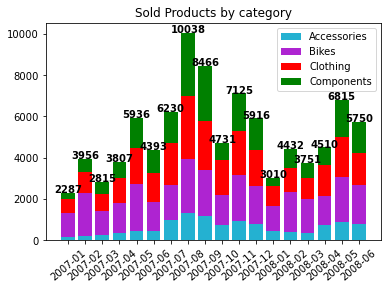

In [524]:
#Getting Product Data

product_data=data_by_product.set_index('Order_year_month')[['Accessories','Bikes','Clothing','Components']]

fig, ax = plt.subplots()

colors = ['#24b1d1', '#ae24d1','red','green']
bottom = np.zeros(len(product_data))

for i, col in enumerate(product_data.columns):
  ax.bar(product_data.index, product_data[col], bottom=bottom, label=col,color=colors[i])
  bottom += np.array(product_data[col])

totals = product_data.sum(axis=1)

y_offset = 4

for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset, round(total), ha='center',
          weight='bold')

plt.xticks(rotation=40)

ax.set_title('Sold Products by category')
ax.legend()

In [439]:
cost_correlation_df=data_by_product[['Accessories','Bikes','Clothing','Components','cost']].corr()
print(cost_correlation_df)

             Accessories     Bikes  Clothing  Components      cost
Accessories     1.000000  0.632335  0.946461    0.892584  0.777290
Bikes           0.632335  1.000000  0.762290    0.828094  0.934089
Clothing        0.946461  0.762290  1.000000    0.952092  0.834326
Components      0.892584  0.828094  0.952092    1.000000  0.885100
cost            0.777290  0.934089  0.834326    0.885100  1.000000


In [440]:
revenue_correlation_df=data_by_product[['Accessories','Bikes','Clothing','Components','revenue']].corr()
print(revenue_correlation_df)

             Accessories     Bikes  Clothing  Components   revenue
Accessories     1.000000  0.632335  0.946461    0.892584  0.725819
Bikes           0.632335  1.000000  0.762290    0.828094  0.987583
Clothing        0.946461  0.762290  1.000000    0.952092  0.842705
Components      0.892584  0.828094  0.952092    1.000000  0.900620
revenue         0.725819  0.987583  0.842705    0.900620  1.000000


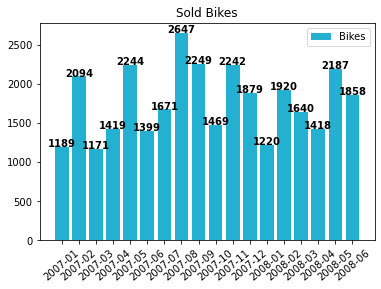

In [525]:
#Getting data by Product category

product_data=data_by_product.set_index('Order_year_month')[['Bikes']]

fig, ax = plt.subplots()

colors = ['#ae24d1']
bottom = np.zeros(len(product_data))

for i, col in enumerate(product_data.columns):
  ax.bar(product_data.index, product_data[col], bottom=bottom, label=col,color=colors[i])
  bottom += np.array(product_data[col])

totals = product_data.sum(axis=1)

y_offset = 4

for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset, round(total), ha='center',
          weight='bold')

plt.xticks(rotation=40)

ax.set_title('Sold Bikes')
ax.legend()

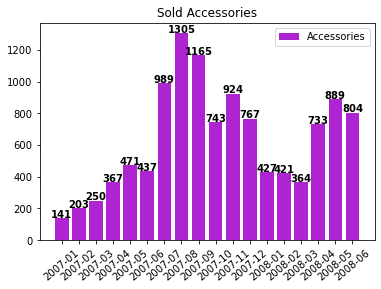

In [526]:
product_data=data_by_product.set_index('Order_year_month')[['Accessories']]

fig, ax = plt.subplots()

colors = ['#24b1d1']
bottom = np.zeros(len(product_data))

for i, col in enumerate(product_data.columns):
  ax.bar(product_data.index, product_data[col], bottom=bottom, label=col,color=colors[i])
  bottom += np.array(product_data[col])

totals = product_data.sum(axis=1)

y_offset = 4

for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset, round(total), ha='center',
          weight='bold')

plt.xticks(rotation=40)

ax.set_title('Sold Accessories')
ax.legend()

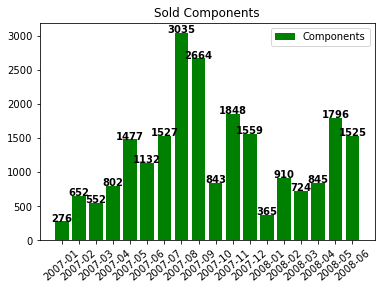

In [528]:
product_data=data_by_product.set_index('Order_year_month')[['Components']]

fig, ax = plt.subplots()

colors = ['Green']
bottom = np.zeros(len(product_data))

for i, col in enumerate(product_data.columns):
  ax.bar(product_data.index, product_data[col], bottom=bottom, label=col,color=colors[i])
  bottom += np.array(product_data[col])

totals = product_data.sum(axis=1)

y_offset = 4

for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset, round(total), ha='center',
          weight='bold')

plt.xticks(rotation=40)

ax.set_title('Sold Components')
ax.legend()

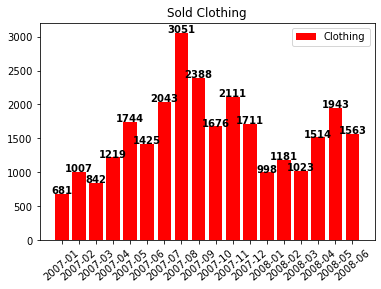

In [529]:
product_data=data_by_product.set_index('Order_year_month')[['Clothing']]

fig, ax = plt.subplots()

colors = ['red']
bottom = np.zeros(len(product_data))

for i, col in enumerate(product_data.columns):
  ax.bar(product_data.index, product_data[col], bottom=bottom, label=col,color=colors[i])
  bottom += np.array(product_data[col])

totals = product_data.sum(axis=1)

y_offset = 4

for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset, round(total), ha='center',
          weight='bold')

plt.xticks(rotation=40)

ax.set_title('Sold Clothing')
ax.legend()

## Check Bike Unit Price Change

In [482]:
bike_data=df[(df['Product_Category']=='Bikes')&(df['Order_month']<7)]\
[['Order_year_month','Order_year','Order_month','Unit_Cost','UnitPrice']]\
.groupby(by=['Order_year_month','Order_year','Order_month'], dropna=False,as_index=False).mean()\
.round({'Unit_Cost':2,
        'UnitPrice':2})

In [662]:
bike_profit_data=df[(df['Product_Category']=='Bikes')&(df['Order_year']>2007)][['Order_year_month',
                                                                                'Product_Sub_Category',
                                                                               'UnitPrice',
                                                                                'Unit_Cost',
                                                                               'OrderQty']]
bike_profit_data=bike_profit_data.groupby(by=['Order_year_month','Product_Sub_Category'],as_index=False).agg({'OrderQty':'sum',
                                                                                              'UnitPrice':'mean',
                                                                                              'Unit_Cost':'mean'})

total_bike_profit_data=bike_profit_data.groupby(by=['Order_year_month'],as_index=False).agg({'OrderQty':'sum',
                                                                                              'UnitPrice':'mean',
                                                                                              'Unit_Cost':'mean'})

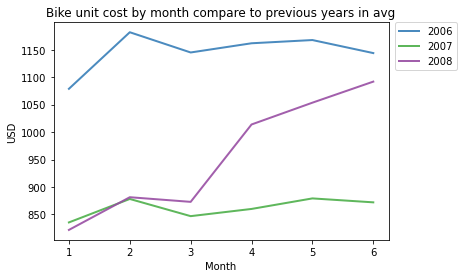

In [663]:
# Plot Unit Cost Changes by Year and Month 

bike_data_cost = bike_data.pivot_table(index=['Order_month'], 
            columns=['Order_year'], values='Unit_Cost')
bike_data_cost['Order_month']=bike_data_cost.index
bike_data_cost.reset_index(drop=True)

palette = plt.get_cmap('Set1')

num=0

for column in bike_data_cost.drop('Order_month', axis=1):
    num+=1
    plt.plot(bike_data_cost['Order_month'], bike_data_cost[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
 
# Add titles
plt.title("Bike unit cost by month compare to previous years in avg")
plt.xlabel("Month")
plt.ylabel("USD")

# Show the graph
plt.show()

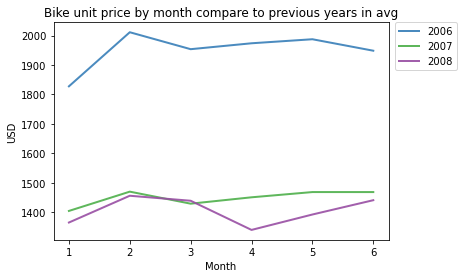

In [627]:
# Plot Unit Prices Changes by Year and Month 

bike_data_cost = bike_data.pivot_table(index=['Order_month'], 
            columns=['Order_year'], values='UnitPrice')
bike_data_cost['Order_month']=bike_data_cost.index
bike_data_cost.reset_index(drop=True)

palette = plt.get_cmap('Set1')

num=0

for column in bike_data_cost.drop('Order_month', axis=1):
    num+=1
    plt.plot(bike_data_cost['Order_month'], bike_data_cost[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
 
# Add titles
plt.title("Bike unit price by month compare to previous years in avg")
plt.xlabel("Month")
plt.ylabel("USD")

# Show the graph
plt.show()

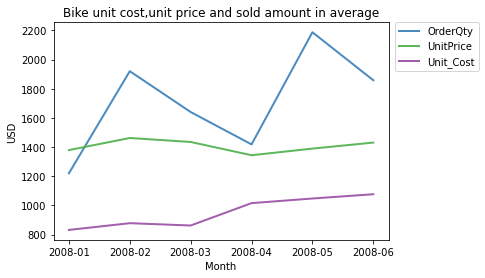

In [664]:
#'Bikes'

bike_moun_data=total_bike_profit_data

palette = plt.get_cmap('Set1')

num=0

for column in bike_moun_data.drop('Order_year_month', axis=1):
    num+=1
    plt.plot(bike_moun_data['Order_year_month'], bike_moun_data[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
 
# Add titles
plt.title("Bike unit cost,unit price and sold amount in average")
plt.xlabel("Month")
plt.ylabel("USD")

# Show the graph
plt.show()

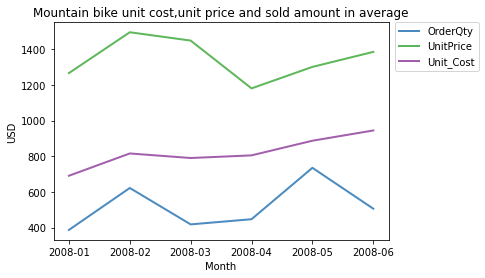

In [626]:
#'Mountain Bikes'

bike_moun_data=bike_profit_data[(bike_profit_data['Product_Sub_Category']=='Mountain Bikes')].drop(['Product_Sub_Category'], axis=1)

palette = plt.get_cmap('Set1')

num=0

for column in bike_moun_data.drop('Order_year_month', axis=1):
    num+=1
    plt.plot(bike_moun_data['Order_year_month'], bike_moun_data[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
 
# Add titles
plt.title("Mountain bike unit cost,unit price and sold amount in average")
plt.xlabel("Month")
plt.ylabel("USD")

# Show the graph
plt.show()

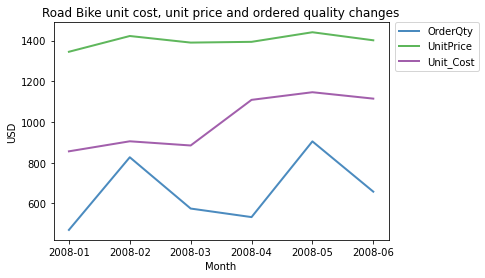

In [604]:
#Road Bike data

road_bike_data=bike_profit_data[(bike_profit_data['Product_Sub_Category']=='Road Bikes')].drop(['Product_Sub_Category'], axis=1)

palette = plt.get_cmap('Set1')

num=0

for column in road_bike_data.drop('Order_year_month', axis=1):
    num+=1
    plt.plot(road_bike_data['Order_year_month'], road_bike_data[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
 
# Add titles
plt.title("Road Bike unit cost, unit price and ordered quality changes")
plt.xlabel("Month")
plt.ylabel("USD")

# Show the graph
plt.show()

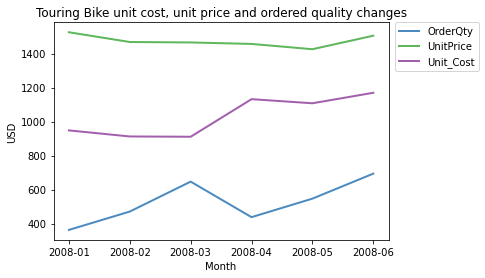

In [603]:
#Touring Bikes data

tour_bike_data=bike_profit_data[(bike_profit_data['Product_Sub_Category']=='Touring Bikes')].drop(['Product_Sub_Category'], axis=1)

palette = plt.get_cmap('Set1')

num=0

for column in tour_bike_data.drop('Order_year_month', axis=1):
    num+=1
    plt.plot(tour_bike_data['Order_year_month'], tour_bike_data[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
 
# Add titles
plt.title("Touring Bike unit cost, unit price and ordered quality changes")
plt.xlabel("Month")
plt.ylabel("USD")

# Show the graph
plt.show()

## Check Accessories Unit Price Change

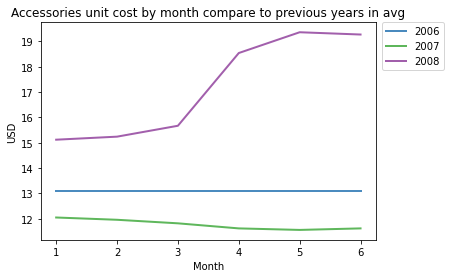

In [635]:
acc_data=df[(df['Product_Category']=='Accessories')&(df['Order_month']<7)]\
[['Order_year_month','Order_year','Order_month','Unit_Cost','UnitPrice','Product_Sub_Category']]\
.groupby(by=['Order_year_month','Order_year','Order_month'], dropna=False,as_index=False).mean()\
.round({'Unit_Cost':2,
        'UnitPrice':2})

# Plot Unit Cost Changes by Year and Month 

acc_data_cost = acc_data.pivot_table(index=['Order_month'], 
            columns=['Order_year'], values='Unit_Cost')
acc_data_cost['Order_month']=acc_data_cost.index
acc_data_cost.reset_index(drop=True)

palette = plt.get_cmap('Set1')

num=0

for column in acc_data_cost.drop('Order_month', axis=1):
    num+=1
    plt.plot(acc_data_cost['Order_month'], acc_data_cost[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
 
# Add titles
plt.title("Accessories unit cost by month compare to previous years in avg")
plt.xlabel("Month")
plt.ylabel("USD")

# Show the graph
plt.show()

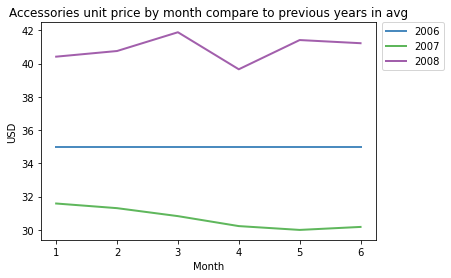

In [632]:
# Plot Unit Prices Changes by Year and Month 

acc_data_price = acc_data.pivot_table(index=['Order_month'], 
            columns=['Order_year'], values='UnitPrice')
acc_data_price['Order_month']=acc_data_price.index
acc_data_price.reset_index(drop=True)

palette = plt.get_cmap('Set1')

num=0

for column in acc_data_price.drop('Order_month', axis=1):
    num+=1
    plt.plot(acc_data_price['Order_month'], acc_data_price[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
 
# Add titles
plt.title("Accessories unit price by month compare to previous years in avg")
plt.xlabel("Month")
plt.ylabel("USD")

# Show the graph
plt.show()

In [656]:
acc_profit_data=df[(df['Product_Category']=='Accessories')&(df['Order_year']>2007)][['Order_year_month',
                                                                                'Product_Sub_Category',
                                                                               'UnitPrice',
                                                                                'Unit_Cost',
                                                                               'OrderQty']]
acc_profit_data=acc_profit_data.groupby(by=['Order_year_month','Product_Sub_Category'],as_index=False).agg({'OrderQty':'sum',
                                                                                              'UnitPrice':'mean',
                                                                                              'Unit_Cost':'mean'})

total_acc_profit_data=acc_profit_data.groupby(by=['Order_year_month'],as_index=False).agg({'OrderQty':'sum',
                                                                                              'UnitPrice':'mean',
                                                                                              'Unit_Cost':'mean'})

In [648]:
acc_sub_type=acc_profit_data['Product_Sub_Category'].unique().tolist()

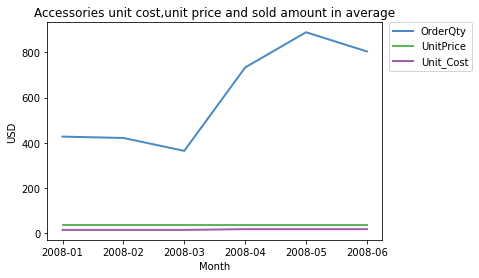

In [658]:
#Total Accessories

acc_sub_data=total_acc_profit_data

palette = plt.get_cmap('Set1')

num=0

for column in acc_sub_data.drop('Order_year_month', axis=1):
    num+=1
    plt.plot(acc_sub_data['Order_year_month'], acc_sub_data[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
 
# Add titles
plt.title("Accessories unit cost,unit price and sold amount in average")
plt.xlabel("Month")
plt.ylabel("USD")

# Show the graph
plt.show()

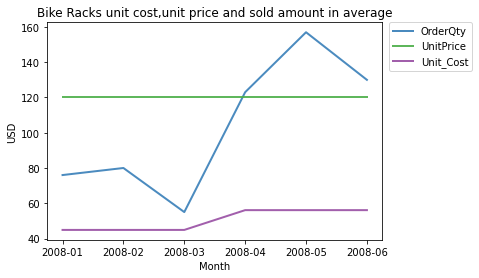

In [641]:
#'Bike Racks'

acc_sub_data=acc_profit_data[(acc_profit_data['Product_Sub_Category']=='Bike Racks')].drop(['Product_Sub_Category'], axis=1)

palette = plt.get_cmap('Set1')

num=0

for column in acc_sub_data.drop('Order_year_month', axis=1):
    num+=1
    plt.plot(acc_sub_data['Order_year_month'], acc_sub_data[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
 
# Add titles
plt.title("Bike Racks unit cost,unit price and sold amount in average")
plt.xlabel("Month")
plt.ylabel("USD")

# Show the graph
plt.show()

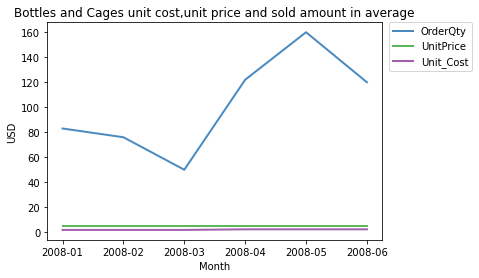

In [642]:
#'Bottles and Cages'

acc_sub_data=acc_profit_data[(acc_profit_data['Product_Sub_Category']=='Bottles and Cages')].drop(['Product_Sub_Category'], axis=1)

palette = plt.get_cmap('Set1')

num=0

for column in acc_sub_data.drop('Order_year_month', axis=1):
    num+=1
    plt.plot(acc_sub_data['Order_year_month'], acc_sub_data[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
 
# Add titles
plt.title("Bottles and Cages unit cost,unit price and sold amount in average")
plt.xlabel("Month")
plt.ylabel("USD")

# Show the graph
plt.show()

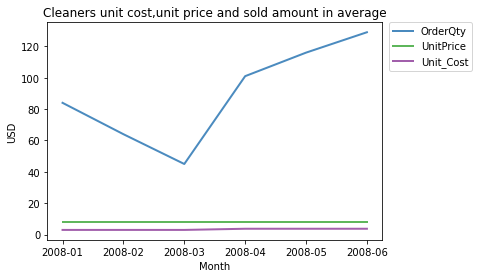

In [643]:
#'Cleaners'

acc_sub_data=acc_profit_data[(acc_profit_data['Product_Sub_Category']=='Cleaners')].drop(['Product_Sub_Category'], axis=1)

palette = plt.get_cmap('Set1')

num=0

for column in acc_sub_data.drop('Order_year_month', axis=1):
    num+=1
    plt.plot(acc_sub_data['Order_year_month'], acc_sub_data[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
 
# Add titles
plt.title("Cleaners unit cost,unit price and sold amount in average")
plt.xlabel("Month")
plt.ylabel("USD")

# Show the graph
plt.show()

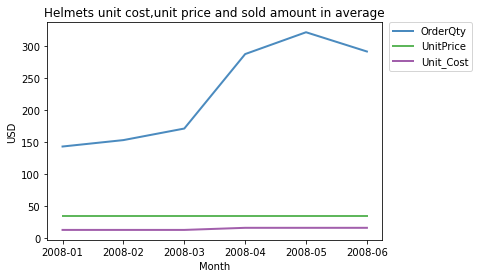

In [653]:
#'Helmets'

acc_sub_data=acc_profit_data[(acc_profit_data['Product_Sub_Category']=='Helmets')].drop(['Product_Sub_Category'], axis=1)

palette = plt.get_cmap('Set1')

num=0

for column in acc_sub_data.drop('Order_year_month', axis=1):
    num+=1
    plt.plot(acc_sub_data['Order_year_month'], acc_sub_data[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
 
# Add titles
plt.title("Helmets unit cost,unit price and sold amount in average")
plt.xlabel("Month")
plt.ylabel("USD")

# Show the graph
plt.show()

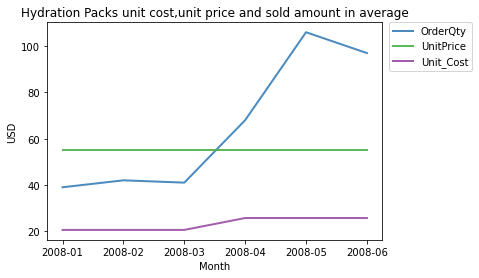

In [654]:
#'Hydration Packs'

acc_sub_data=acc_profit_data[(acc_profit_data['Product_Sub_Category']=='Hydration Packs')].drop(['Product_Sub_Category'], axis=1)

palette = plt.get_cmap('Set1')

num=0

for column in acc_sub_data.drop('Order_year_month', axis=1):
    num+=1
    plt.plot(acc_sub_data['Order_year_month'], acc_sub_data[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
 
# Add titles
plt.title("Hydration Packs unit cost,unit price and sold amount in average")
plt.xlabel("Month")
plt.ylabel("USD")

# Show the graph
plt.show()

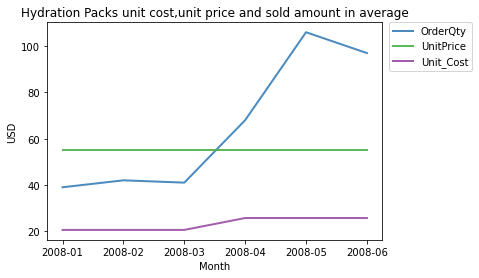

In [655]:
#'Tires and Tubes'

acc_sub_data=acc_profit_data[(acc_profit_data['Product_Sub_Category']=='Hydration Packs')].drop(['Product_Sub_Category'], axis=1)

palette = plt.get_cmap('Set1')

num=0

for column in acc_sub_data.drop('Order_year_month', axis=1):
    num+=1
    plt.plot(acc_sub_data['Order_year_month'], acc_sub_data[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
 
# Add titles
plt.title("Hydration Packs unit cost,unit price and sold amount in average")
plt.xlabel("Month")
plt.ylabel("USD")

# Show the graph
plt.show()

## Check Components Unit Price and Cost Change

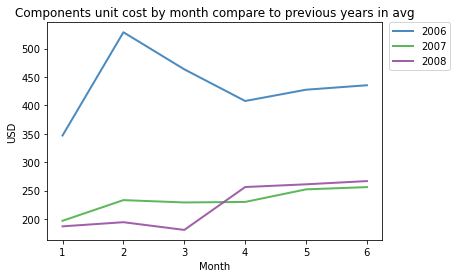

In [630]:
#Unit Cost

components_data=df[(df['Product_Category']=='Components')&(df['Order_month']<7)]\
[['Order_year_month','Order_year','Order_month','Unit_Cost','UnitPrice']]\
.groupby(by=['Order_year_month','Order_year','Order_month'], dropna=False,as_index=False).mean()\
.round({'Unit_Cost':2,
        'UnitPrice':2})

# Plot Unit Cost Changes by Year and Month 

data_cost = components_data.pivot_table(index=['Order_month'], 
            columns=['Order_year'], values='Unit_Cost')
data_cost['Order_month']=data_cost.index
data_cost.reset_index(drop=True)

palette = plt.get_cmap('Set1')

num=0

for column in data_cost.drop('Order_month', axis=1):
    num+=1
    plt.plot(data_cost['Order_month'], data_cost[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
 
# Add titles
plt.title("Components unit cost by month compare to previous years in avg")
plt.xlabel("Month")
plt.ylabel("USD")

# Show the graph
plt.show()

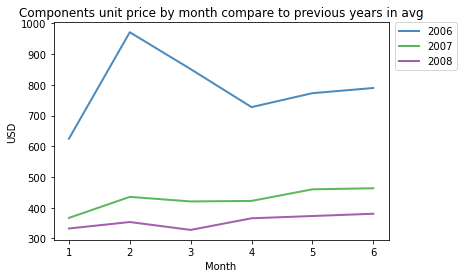

In [633]:
# Plot Unit Prices Changes by Year and Month 

acc_data_price = components_data.pivot_table(index=['Order_month'], 
            columns=['Order_year'], values='UnitPrice')
acc_data_price['Order_month']=acc_data_price.index
acc_data_price.reset_index(drop=True)

palette = plt.get_cmap('Set1')

num=0

for column in acc_data_price.drop('Order_month', axis=1):
    num+=1
    plt.plot(acc_data_price['Order_month'], acc_data_price[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
 
# Add titles
plt.title("Components unit price by month compare to previous years in avg")
plt.xlabel("Month")
plt.ylabel("USD")

# Show the graph
plt.show()

In [660]:
components_profit_data=df[(df['Product_Category']=='Components')&(df['Order_year']>2007)][['Order_year_month',
                                                                                'Product_Sub_Category',
                                                                               'UnitPrice',
                                                                                'Unit_Cost',
                                                                               'OrderQty']]
components_profit_data=components_profit_data.groupby(by=['Order_year_month','Product_Sub_Category'],as_index=False).agg({'OrderQty':'sum',
                                                                                              'UnitPrice':'mean',
                                                                                              'Unit_Cost':'mean'})

total_components_profit_data=components_profit_data.groupby(by=['Order_year_month'],as_index=False).agg({'OrderQty':'sum',
                                                                                              'UnitPrice':'mean',
                                                                                              'Unit_Cost':'mean'})

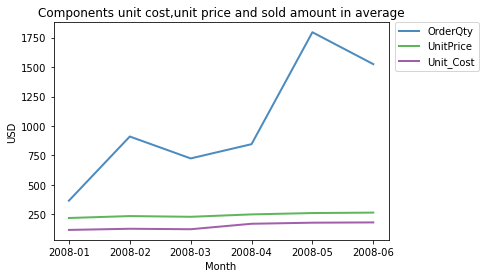

In [661]:
#Total Components

acc_sub_data=total_components_profit_data

palette = plt.get_cmap('Set1')

num=0

for column in acc_sub_data.drop('Order_year_month', axis=1):
    num+=1
    plt.plot(acc_sub_data['Order_year_month'], acc_sub_data[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
 
# Add titles
plt.title("Components unit cost,unit price and sold amount in average")
plt.xlabel("Month")
plt.ylabel("USD")

# Show the graph
plt.show()

## Check Clothing Unit Price and Cost Change

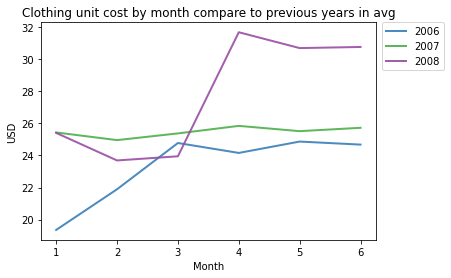

In [631]:
clothes_data=df[(df['Product_Category']=='Clothing')&(df['Order_month']<7)]\
[['Order_year_month','Order_year','Order_month','Unit_Cost','UnitPrice']]\
.groupby(by=['Order_year_month','Order_year','Order_month'], dropna=False,as_index=False).mean()\
.round({'Unit_Cost':2,
        'UnitPrice':2})

# Plot Unit Cost Changes by Year and Month 

data_cost = clothes_data.pivot_table(index=['Order_month'], 
            columns=['Order_year'], values='Unit_Cost')
data_cost['Order_month']=data_cost.index
data_cost.reset_index(drop=True)

palette = plt.get_cmap('Set1')

num=0

for column in data_cost.drop('Order_month', axis=1):
    num+=1
    plt.plot(data_cost['Order_month'], data_cost[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
 
# Add titles
plt.title("Clothing unit cost by month compare to previous years in avg")
plt.xlabel("Month")
plt.ylabel("USD")

# Show the graph
plt.show()

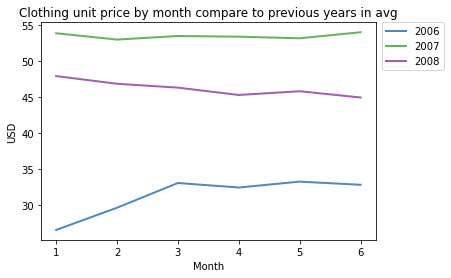

In [634]:
# Plot Unit Prices Changes by Year and Month 

acc_data_price = clothes_data.pivot_table(index=['Order_month'], 
            columns=['Order_year'], values='UnitPrice')
acc_data_price['Order_month']=acc_data_price.index
acc_data_price.reset_index(drop=True)

palette = plt.get_cmap('Set1')

num=0

for column in acc_data_price.drop('Order_month', axis=1):
    num+=1
    plt.plot(acc_data_price['Order_month'], acc_data_price[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
 
# Add titles
plt.title("Clothing unit price by month compare to previous years in avg")
plt.xlabel("Month")
plt.ylabel("USD")

# Show the graph
plt.show()

In [670]:
clothes_profit_data=df[(df['Product_Category']=='Clothing')&(df['Order_year']>2007)][['Order_year_month',
                                                                                'Product_Sub_Category',
                                                                               'UnitPrice',
                                                                                'Unit_Cost',
                                                                               'OrderQty']]
clothes_profit_data=clothes_profit_data.groupby(by=['Order_year_month','Product_Sub_Category'],as_index=False).agg({'OrderQty':'sum',
                                                                                              'UnitPrice':'mean',
                                                                                              'Unit_Cost':'mean'})

total_clothes_profit_data=clothes_profit_data.groupby(by=['Order_year_month'],as_index=False).agg({'OrderQty':'sum',
                                                                                              'UnitPrice':'mean',
                                                                                              'Unit_Cost':'mean'})

In [669]:
df['Product_Category'].unique()

array(['Bikes', 'Clothing', 'Accessories', 'Components'], dtype=object)

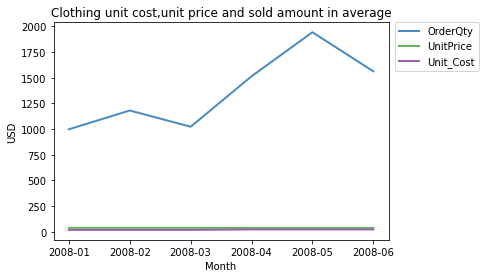

In [672]:
#Total Clothes

acc_sub_data=total_clothes_profit_data

palette = plt.get_cmap('Set1')

num=0

for column in acc_sub_data.drop('Order_year_month', axis=1):
    num+=1
    plt.plot(acc_sub_data['Order_year_month'], acc_sub_data[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
 
# Add titles
plt.title("Clothing unit cost,unit price and sold amount in average")
plt.xlabel("Month")
plt.ylabel("USD")

# Show the graph
plt.show()

## US MARKET ANALYIS

In [362]:
#Get the monthly US performance

df_region=df[(df['Sales_Region']=='United States')]

monthly_summary_us=df_region.groupby(by=["Order_year_month",'Order_year','Order_month'], dropna=False,as_index=False)\
.agg({'Unit_Cost':'mean',
     'UnitPrice':'mean',
     'real_unit_price':'mean',
     'UnitPriceDiscount':'mean',
     'revenue':'sum',
     'cost':'sum',
     'OrderQty':'sum',
     'Unit_Freight_Cost':'mean'})\
.sort_values(by=["Order_year_month",'Order_year','Order_month'])[["Order_year_month",
                                                                  'Order_year',
                                                                  'Order_month',
                                                                  'Unit_Cost',
                                                                  'UnitPrice',
                                                                  'real_unit_price',
                                                                  'UnitPriceDiscount',
                                                                  'revenue',
                                                                  'cost',
                                                                  'OrderQty',
                                                                  'Unit_Freight_Cost']]

monthly_summary_us['profit(in_million_$)']=monthly_summary['revenue']-monthly_summary['cost']

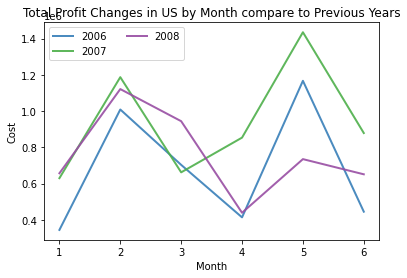

In [364]:
#Total Profit 

data=monthly_summary_us[(monthly_summary_us['Order_month']<7)]
data=data[['Order_year','Order_month','profit(in_million_$)']]
data = data.pivot_table(index=['Order_month'], 
            columns=['Order_year'], values='profit(in_million_$)')
data['Order_month']=data.index
data.reset_index(drop=True)

palette = plt.get_cmap('Set1')

num=0

for column in data.drop('Order_month', axis=1):
    num+=1
    plt.plot(data['Order_month'], data[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("Total Profit Changes in US by Month compare to Previous Years")
plt.xlabel("Month")
plt.ylabel("Cost")

# Show the graph
plt.show()

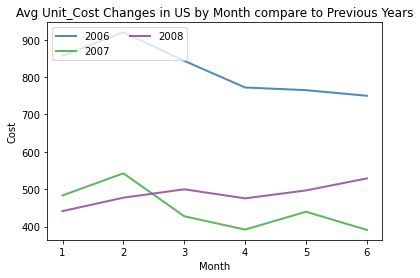

In [365]:
#Unit cost change

data=monthly_summary_us[(monthly_summary_us['Order_month']<7)]
data=data[['Order_year','Order_month','Unit_Cost']]
data = data.pivot_table(index=['Order_month'], 
            columns=['Order_year'], values='Unit_Cost')
data['Order_month']=data.index
data.reset_index(drop=True)

palette = plt.get_cmap('Set1')

num=0

for column in data.drop('Order_month', axis=1):
    num+=1
    plt.plot(data['Order_month'], data[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("Avg Unit_Cost Changes in US by Month compare to Previous Years")
plt.xlabel("Month")
plt.ylabel("Cost")

# Show the graph
plt.show()